In [ ]:
%matplotlib inline 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#Re-index so that content is the indexer and drop unnecessary columns
#Load dataframe for incubation
df = pd.read_excel(r"./2022_02_25_Brendan_LOD_optimisation .xlsx", index_col=2)
df = df.drop(columns = ['Well'])
df = df.set_index('Content')
df1 = df.iloc[:, : 59]
df2 = df.iloc[:,59:-1]

In [3]:
#Make variables for time and separate into triplicates
Time = df1.loc['Time [h]']*60

Trip_mean = []
Trip_std = []
Trip_mean_norm = []
Trip_std_norm = []
for i in range(16):
    sample = 'Sample X' + str(i+1)
    Trip = df1.loc[sample]
    Trip_norm = np.array(df1.loc[sample])/np.array(df2.loc[sample])
    Trip_mean_single = Trip.mean(axis=0)
    Trip_std_single = Trip.std(axis=0)
    Trip_mean_norm_single = Trip_norm.mean(axis=0)
    Trip_std_norm_single = Trip_norm.std(axis=0)
    Trip_mean.append(Trip_mean_single)
    Trip_std.append(Trip_std_single)
    Trip_mean_norm.append(Trip_mean_norm_single)
    Trip_std_norm.append(Trip_std_norm_single)
    
Trip1 = df1.loc['Sample X1']
Trip1_mean = Trip1.mean(axis=0)
Trip1_std = Trip1.std(axis=0)

Trip2 = df1.loc['Sample X2']
Trip2_mean = Trip2.mean(axis=0)
Trip2_std = Trip2.std(axis=0)

Trip3 = df1.loc['Sample X3']
Trip3_mean = Trip3.mean(axis=0)
Trip3_std = Trip3.std(axis=0)

Trip4 = df1.loc['Sample X4']
Trip4_mean = Trip4.mean(axis=0)
Trip4_std = Trip4.std(axis=0)

Trip5 = df1.loc['Sample X5']
Trip5_mean = Trip5[0:2].mean(axis=0)
Trip5_std = Trip5[0:2].std(axis=0)

Trip6 = df1.loc['Sample X6']
Trip6_mean = Trip6.mean(axis=0)
Trip6_std = Trip6.std(axis=0)

Trip7 = df1.loc['Sample X7']
Trip7_mean = Trip7.mean(axis=0)
Trip7_std = Trip7.std(axis=0)

Trip8 = df1.loc['Sample X8']
Trip8_mean = Trip8.mean(axis=0)
Trip8_std = Trip8.std(axis=0)

Trip9 = df1.loc['Sample X9']
Trip9_mean = Trip9.mean(axis=0)
Trip9_std = Trip9.std(axis=0)

Trip10 = df1.loc['Sample X10']
Trip10_mean = Trip10.mean(axis=0)
Trip10_std = Trip10.std(axis=0)

Trip11 = df1.loc['Sample X11']
Trip11_mean = Trip11.mean(axis=0)
Trip11_std = Trip11.std(axis=0)

Trip12 = df1.loc['Sample X12']
Trip12_mean = Trip12.mean(axis=0)
Trip12_std = Trip12.std(axis=0)

Trip13 = df1.loc['Sample X13']
Trip13_mean = Trip13.mean(axis=0)
Trip13_std = Trip13.std(axis=0)

Trip14 = df1.loc['Sample X14']
Trip14_mean = Trip14.mean(axis=0)
Trip14_std = Trip14.std(axis=0)

Trip15 = df1.loc['Sample X15']
Trip15_mean = Trip15.mean(axis=0)
Trip15_std = Trip15.std(axis=0)

Trip16 = df1.loc['Sample X16']
Trip16_mean = Trip16.mean(axis=0)
Trip16_std = Trip16.std(axis=0)

In [4]:
#Plot all data 
fig = go.Figure(go.Scatter(
    ))
fig.add_trace(go.Scatter(x=Time, y=Trip1_mean, error_y = dict(type='data', array=Trip1_std), name = 'Buffer + Cas + crRNA + 0 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip2_mean, error_y = dict(type='data', array=Trip2_std), name = 'Buffer + Cas + crRNA + 234.9 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip3_mean, error_y = dict(type='data', array=Trip3_std), name = 'Buffer + Cas + crRNA + 469.9 pM target DNA', marker = dict(color = 'brown')))
fig.add_trace(go.Scatter(x=Time, y=Trip4_mean, error_y = dict(type='data', array=Trip4_std), name = 'Buffer + Cas + crRNA + 704.8 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip5_mean, error_y = dict(type='data', array=Trip5_std), name = 'Buffer + Cas + crRNA + 939.7 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip6_mean, error_y = dict(type='data', array=Trip6_std), name = 'Buffer + Cas + crRNA + 1174.6 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip7_mean, error_y = dict(type='data', array=Trip7_std), name = 'Buffer + Cas + crRNA + 1409.6 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip8_mean, error_y = dict(type='data', array=Trip8_std), name = 'Buffer + Cas + crRNA + 1644.5 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip9_mean, error_y = dict(type='data', array=Trip9_std), name = 'Buffer + Cas + crRNA + 1879.4 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip10_mean, error_y = dict(type='data', array=Trip10_std), name = 'Buffer + Cas + crRNA + 2114.4 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip11_mean, error_y = dict(type='data', array=Trip11_std), name = 'Buffer + Cas + crRNA + 2349.3 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip12_mean, error_y = dict(type='data', array=Trip12_std), name = 'Buffer + Cas + crRNA + 2584.2 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip13_mean, error_y = dict(type='data', array=Trip13_std), name = 'Buffer + Cas + crRNA + 2819.2 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip14_mean, error_y = dict(type='data', array=Trip14_std), name = 'Buffer + Cas + crRNA + 3054.1 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip15_mean, error_y = dict(type='data', array=Trip15_std), name = 'Buffer + Cas + crRNA + 3289 pM target DNA'))
fig.add_trace(go.Scatter(x=Time, y=Trip16_mean, error_y = dict(type='data', array=Trip16_std), name = 'Buffer + Cas + crRNA + 3523.9 pM target DNA'))
fig.update_layout(title="FQ5 probe lba Cas 12a Collateral Cleavage assay (gRNA 1 and ssDNA Target 1) 25/2/22", xaxis_title="Time (min)", yaxis_title="Fluorescence (AU)", legend_title="Reaction description", plot_bgcolor = 'white')


fig.show() 

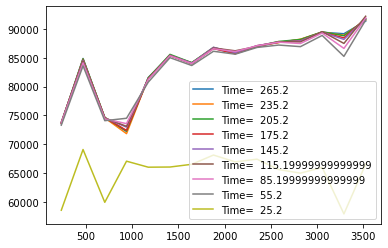

In [6]:
for i in range(1,10):
    i *= 6
    plt.plot([234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9],np.array(Trip_mean)[1:, -i], label = 'Time=  {}'.format(Time[-i]))
plt.legend()
plt.show()

for i in range(1,10):
    i *= 6
    plt.plot([234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9],np.array(Trip_mean_norm)[1:, -i], label = 'Time=  {}'.format(Time[-i]))
plt.legend()
plt.show()

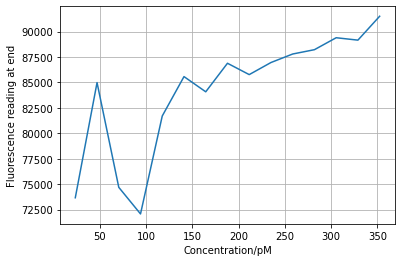

In [24]:
concs = np.array([234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9])/10
plt.plot(concs,np.array(Trip_mean)[1:,50])
plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at end');plt.grid()

In [ ]:
import matplotlib.animation as ani
from IPython.display import HTML
concs = np.array([234.9,469.9,704.8,939.7,1174.6,1409.6,1644.5,1879.4,2114.4,2349.3,2584.2,2819.2,3054.1,3289,3523.9])/10
def graphfunc(i):
    ax.cla()
    x = concs
    y = np.array(Trip_mean)[1:,i]
    error = np.array(Trip_std)[1:,i]
    ax.errorbar(x,y,yerr=error)
    plt.plot(x,y)
    # ax.title('Time = {}'.format(Time[i]))
fig,ax = plt.subplots()
animator = ani.FuncAnimation(fig, graphfunc, frames=57, interval = 200)
# plt.xlabel('Concentration/pM');plt.ylabel('Fluorescence reading at end');plt.grid()
plt.show()
HTML(animator.to_html5_video())

In [34]:
df_linear = pd.DataFrame({'concs':concs,'values': np.array(Trip_mean)[1:, -1]})
minimum = np.inf
for j in range(len(concs)-6):
    for k in range(59):
        X = concs[j:].reshape(-1,1)
        y = np.array(Trip_mean)[1:, k][j:].reshape(-1,1)
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression().fit(X, y)
        grad = reg.coef_
        grad
        std = np.std(reg.predict(X) - y)
        std
        limitD = 3 * std / grad
        if limitD < minimum and limitD > 0:
            minimum = limitD
            concbound = j
            timepoint = k
minimum, concbound, timepoint


(array([[28.6362434]]), 8, 4)

In [ ]:
df_linear = pd.DataFrame({'concs':concs,'values': np.array(Trip_mean)[1:, -1]})
minimum = np.inf
for j in range(len(concs)-6):
    for k in range(59):
        X = concs[j:].reshape(-1,1)
        y = np.array(Trip_mean_norm)[1:, k][j:].reshape(-1,1)
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression().fit(X, y)
        grad = reg.coef_
        grad
        std = np.std(reg.predict(X) - y)
        std
        limitD = 3 * std / grad
        if limitD < minimum and limitD > 0:
            minimum = limitD
            concbound_norm = j
            timepoint_norm = k
minimum, concbound_norm, timepoint_norm


In [50]:
X = concs[concbound:].reshape(-1,1)
y = np.array(Trip_mean)[1:, timepoint][concbound:].reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
grad = reg.coef_
grad
std = np.std(reg.predict(X) - y)
std
limitD = 3 * std / grad

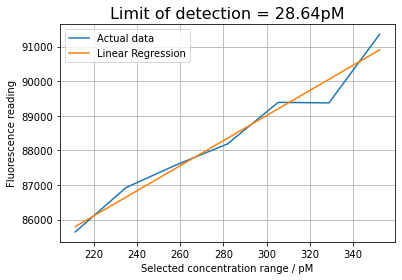

In [66]:
plt.plot(X,y, label = 'Actual data')
plt.plot(X,reg.predict(X),label = 'Linear Regression')
plt.title('Limit of detection = {}pM'.format(round(limitD.ravel()[0],2)), fontsize = 16)
plt.xlabel('Selected concentration range / pM');plt.ylabel('Fluorescence reading');plt.grid();plt.legend()
plt.show()

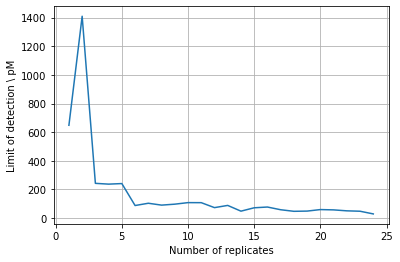

[array([[647.94157583]]),
 array([[1409.80574872]]),
 array([[242.23193065]]),
 array([[236.74704824]]),
 array([[240.67904172]]),
 array([[87.30049634]]),
 array([[103.16627237]]),
 array([[90.08633616]]),
 array([[96.75083852]]),
 array([[107.54219175]]),
 array([[107.22113018]]),
 array([[72.55875987]]),
 array([[87.9969419]]),
 array([[47.94368696]]),
 array([[71.46260269]]),
 array([[76.75267939]]),
 array([[57.84244418]]),
 array([[46.83617761]]),
 array([[48.36219554]]),
 array([[58.96418053]]),
 array([[56.81818644]]),
 array([[50.17786991]]),
 array([[47.39346472]]),
 array([[28.6362434]])]

In [40]:
limitDs = []
for replicate in range(1,25):
    Trip1 = df1.loc['Sample X1'][:replicate]
    Trip1_mean = Trip1.mean(axis=0)
    Trip1_std = Trip1.std(axis=0)

    Trip2 = df1.loc['Sample X2'][:replicate]
    Trip2_mean = Trip2.mean(axis=0)
    Trip2_std = Trip2.std(axis=0)

    Trip3 = df1.loc['Sample X3'][:replicate]
    Trip3_mean = Trip3.mean(axis=0)
    Trip3_std = Trip3.std(axis=0)

    Trip4 = df1.loc['Sample X4'][:replicate]
    Trip4_mean = Trip4.mean(axis=0)
    Trip4_std = Trip4.std(axis=0)

    Trip5 = df1.loc['Sample X5'][:replicate]
    Trip5_mean = Trip5[0:2].mean(axis=0)
    Trip5_std = Trip5[0:2].std(axis=0)

    Trip6 = df1.loc['Sample X6'][:replicate]
    Trip6_mean = Trip6.mean(axis=0)
    Trip6_std = Trip6.std(axis=0)

    Trip7 = df1.loc['Sample X7'][:replicate]
    Trip7_mean = Trip7.mean(axis=0)
    Trip7_std = Trip7.std(axis=0)

    Trip8 = df1.loc['Sample X8'][:replicate]
    Trip8_mean = Trip8.mean(axis=0)
    Trip8_std = Trip8.std(axis=0)

    Trip9 = df1.loc['Sample X9'][:replicate]
    Trip9_mean = Trip9.mean(axis=0)
    Trip9_std = Trip9.std(axis=0)

    Trip10 = df1.loc['Sample X10'][:replicate]
    Trip10_mean = Trip10.mean(axis=0)
    Trip10_std = Trip10.std(axis=0)

    Trip11 = df1.loc['Sample X11'][:replicate]
    Trip11_mean = Trip11.mean(axis=0)
    Trip11_std = Trip11.std(axis=0)

    Trip12 = df1.loc['Sample X12'][:replicate]
    Trip12_mean = Trip12.mean(axis=0)
    Trip12_std = Trip12.std(axis=0)

    Trip13 = df1.loc['Sample X13'][:replicate]
    Trip13_mean = Trip13.mean(axis=0)
    Trip13_std = Trip13.std(axis=0)

    Trip14 = df1.loc['Sample X14'][:replicate]
    Trip14_mean = Trip14.mean(axis=0)
    Trip14_std = Trip14.std(axis=0)

    Trip15 = df1.loc['Sample X15'][:replicate]
    Trip15_mean = Trip15.mean(axis=0)
    Trip15_std = Trip15.std(axis=0)

    Trip16 = df1.loc['Sample X16'][:replicate]
    Trip16_mean = Trip16.mean(axis=0)
    Trip16_std = Trip16.std(axis=0)

    Trip_mean = [Trip1_mean,Trip2_mean,Trip3_mean,Trip4_mean,Trip5_mean,Trip6_mean,Trip7_mean,Trip8_mean,Trip9_mean,Trip10_mean,Trip11_mean,Trip12_mean,Trip13_mean,Trip14_mean,Trip15_mean,Trip16_mean]

    X = concs[concbound:].reshape(-1,1)
    y = np.array(Trip_mean)[1:, timepoint][concbound:].reshape(-1,1)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X, y)
    grad = reg.coef_
    std = np.std(reg.predict(X) - y)
    limitDs.append(3 * std / grad)
plt.plot(np.arange(1,25),np.array(limitDs).ravel())
plt.xlabel('Number of replicates');plt.ylabel('Limit of detection \ pM');plt.grid()
plt.show()
limitDs

Seems best linear region to use if around 1nM, so [500,600,700,800,900,1000,1100,1200,1300,1400]pM

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential(t, a, b, c):
    return a * (1-np.exp(-b * t)) + c
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
t = Time 

In [42]:
def calcKValues(data, func, maxLimit = 20000, normalise = True, plot = False):
  y = data

  if func == 'exponential':
    popt, pcov = curve_fit(exponential, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), 1, np.min(y)], maxfev=20000)
    return popt[1]

  if func == 'sigmoid':
    popt, pcov = curve_fit(sigmoid, t.astype('float64'), y.astype('float64'), p0 = [np.max(y), np.median(t), 1, np.min(y)], maxfev=20000)
    return popt[2]

In [43]:
ks = [calcKValues(mean, 'sigmoid') for mean in Trip_mean]

In [44]:
ks

[0.004415663698875677,
 0.11799624529825008,
 0.12622641629736475,
 0.14071209259962253,
 0.20661794863046754,
 0.15837085984249172,
 0.1559615596090635,
 0.15901752357600724,
 0.15619970646671144,
 0.15981405240477478,
 0.15772029826206937,
 0.15261263482848486,
 0.14380045906200709,
 0.14291757289110113,
 0.11231640142595947,
 0.14639852338968898]

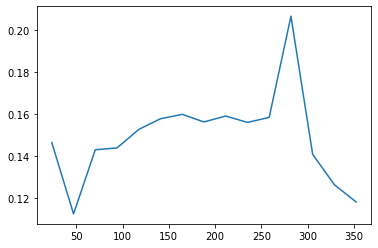

In [49]:
plt.plot(concs,ks[1:][::-1])
# plt.xscale('log')
plt.show()